In [1]:
from scipy import *
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import matplotlib.animation
import PlanktonSignaling.basics as PS
from scipy import ndimage
from cv2 import *
%matplotlib notebook
%matplotlib inline

In [2]:
def constantDep(c,depMaxStr,**kwargs):
    '''Constant deposition function'''
    return(array(depMaxStr*ones(len(c))))

def atanDep(c,depMaxStr,depThreshold=0.08,depTransWidth=1/250,**kwargs):
    '''arctan (soft switch) transition function'''

    return(depMaxStr/pi*(arctan((-c+depThreshold)/depTransWidth)+pi/2))

def linAtanDep(c,depMaxStr,depThreshold=0.08,depTransWidth=1/250,**kwargs):
    '''arctan (soft switch) transition function'''

    return(depMaxStr/pi*(c+0.1*depThreshold)/1.1/depThreshold*(arctan((-c+depThreshold)/depTransWidth)+pi/2))

def blobdetect(thresh, maxValue, swimmers):
    im2 = np.array(swimmers*255/0.08, dtype = np.uint8)
    threshed = cv2.adaptiveThreshold(im2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    #plt.imshow(im2)

    th, dst = cv2.threshold(im2, thresh, maxValue, cv2.THRESH_BINARY)
    #plt.imshow(dst)
    im = cv2.bitwise_not(dst)

    params = cv2.SimpleBlobDetector_Params()

    params.minThreshold = 0
    params.maxThreshold = 300
    params.filterByConvexity = False
    params.filterByArea = False

    detector = cv2.SimpleBlobDetector_create(params)

    #Detect the blobs

    keypoints = detector.detect(im)

    im=cv2.bitwise_not(im)

    #plot the blob contours

    #im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    #plt.imshow(im_with_keypoints)

    #outputs how many blobs there are 

    return(len(keypoints));

def blobdetect2(thresh, maxValue, swimmers):
    im2 = np.array(swimmers*255/0.08, dtype = np.uint8)
    im3 = np.tile(im2,(2,2))
    threshed = cv2.adaptiveThreshold(im3, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    #plt.imshow(im2)

    th, dst = cv2.threshold(im3, thresh, maxValue, cv2.THRESH_BINARY)
    #plt.imshow(dst)
    im = cv2.bitwise_not(dst)

    params = cv2.SimpleBlobDetector_Params()

    params.minThreshold = 0
    params.maxThreshold = 300
    params.filterByConvexity = False
    params.filterByArea = False

    detector = cv2.SimpleBlobDetector_create(params)

    #Detect the blobs

    keypoints = detector.detect(im)

    im=cv2.bitwise_not(im)

    #plot the blob contours

    #im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    #plt.imshow(im_with_keypoints)

    #outputs how many blobs there are 

    return(len(keypoints));

def blobdetect3(thresh, maxValue, swimmers):
    im2 = np.array(swimmers*255/0.08, dtype = np.uint8)
    im3 = np.tile(im2,(3,3))
    threshed = cv2.adaptiveThreshold(im3, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    #plt.imshow(im2)

    th, dst = cv2.threshold(im3, thresh, maxValue, cv2.THRESH_BINARY)
    #plt.imshow(dst)
    im = cv2.bitwise_not(dst)

    params = cv2.SimpleBlobDetector_Params()

    params.minThreshold = 0
    params.maxThreshold = 300
    params.filterByConvexity = False
    params.filterByArea = False

    detector = cv2.SimpleBlobDetector_create(params)

    #Detect the blobs

    keypoints = detector.detect(im)

    im=cv2.bitwise_not(im)

    #plot the blob contours

    #im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    #plt.imshow(im_with_keypoints)

    #outputs how many blobs there are 

    return(len(keypoints));

def countblob(a,b,c):
    A = np.array([[1,2,4],[4,3,9],[9,12,16]])
    B = np.array([[a],[b],[c]])
    x = np.linalg.solve(A,B)
    return(x.sum());


def initial_conditions(x,y):
    return(0*x)

# RT swimmers in a background field

Set up some basic initial conditions.

**Caution:** All length scales should be roughly the same or something is going to be underresolved.

## Simulate the system.  The upper value of the inner loop can be adjusted as needed.  The inner value of 1000 is a pretty long simulation.

Initialize the scalar field.  Lay out some particles.

#### Lambda Experiments

In [21]:
lam = [1,3,6]

Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposition variance: 1.28e-04, length scale: 1.13e-02.  a2: 4.00e-04.
Exact deposi

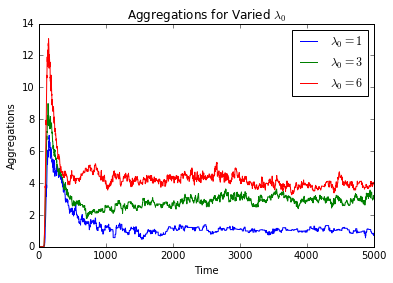

In [22]:
for j in range(0,3):
    m = lam[j]
    meshsize = 40
    Swimmers = PS.Plankton(constantDep,N = meshsize,depMaxStr=1.0e-4,depVar=4.0e-4,k=0.02,speed=0.05,
                        lambda0=m,kappa=6.4e-3,beta=1,depTransWidth=1/250,depThreshold=0.08)
    
    Swimmers.SetIC(initial_conditions)

    pos = [array([0.1,0.1])]
    aggreg = [array([0,0])]
    th = rand()*2*pi
    vel = [Swimmers.speed*array([cos(th),sin(th)])]
    for l in range(0,20):
        for k in range(0,20):
            pos = np.append(pos,[array([mod(k*0.05 + 0.01*(rand()-0.5) + 0.05,1),
                                      mod(l*0.05 + 0.01*(rand()-0.5) + 0.05,1)])],axis=0)
            th  = rand()*2*pi
            vel = np.append(vel,[Swimmers.speed*array([cos(th),sin(th)])],axis=0)

            
    pos_store = list([pos[:,:]])
    pos_store = list([np.array(pos)])
    scalar_store = list([Swimmers.Meshed()])

    count = 1
    for plot in range(0,5):
        for k in range(0,1000):
            Swimmers.Update2(Swimmers.scalar,pos,vel)
            pos_store.append(np.array(pos))
            scalar_store.append(Swimmers.Meshed())
            aggregations = countblob(blobdetect(255*.54, 255, Swimmers.Meshed()),blobdetect2(255*.54, 255, Swimmers.Meshed()),blobdetect3(255*.54, 255, Swimmers.Meshed()))
            aggreg = np.append(aggreg,[array([count,aggregations])], axis=0)
            count = count + 1
        
    for i in range(1,10):
        meshsize = 40
        Swimmers = PS.Plankton(constantDep,N = meshsize,depMaxStr=1.0e-4,depVar=4.0e-4,k=0.02,speed=0.05,
                            lambda0=m,kappa=6.4e-3,beta=1,depTransWidth=1/250,depThreshold=0.08)

        Swimmers.SetIC(initial_conditions)

        pos = [array([0.1,0.1])]
        th = rand()*2*pi
        vel = [Swimmers.speed*array([cos(th),sin(th)])]
        for l in range(0,20):
            for k in range(0,20):
                pos = np.append(pos,[array([mod(k*0.05 + 0.01*(rand()-0.5) + 0.05,1),
                                            mod(l*0.05 + 0.01*(rand()-0.5) + 0.05,1)])],axis=0)
                th  = rand()*2*pi
                vel = np.append(vel,[Swimmers.speed*array([cos(th),sin(th)])],axis=0)

        pos_store = list([pos[:,:]])
        pos_store = list([np.array(pos)])
        scalar_store = list([Swimmers.Meshed()])

        count = 1
        for plot in range(0,5):
            for k in range(0,1000):
                Swimmers.Update2(Swimmers.scalar,pos,vel)
                pos_store.append(np.array(pos))
                scalar_store.append(Swimmers.Meshed())
                aggregations = countblob(blobdetect(255*.54, 255, Swimmers.Meshed()),blobdetect2(255*.54, 255, Swimmers.Meshed()),blobdetect3(255*.54, 255, Swimmers.Meshed()))
                aggreg[count,1] = aggreg[count,1] + aggregations
                count = count + 1
                
    plt.plot(aggreg[:,0], aggreg[:,1]/10)
    
plt.xlabel('Time')
plt.ylabel('Aggregations')
plt.title(r'Aggregations for Varied $\lambda_0$')
plt.legend([r'$\lambda_0 = 1$',r'$\lambda_0 = 3$',r'$\lambda_0 = 6$'])

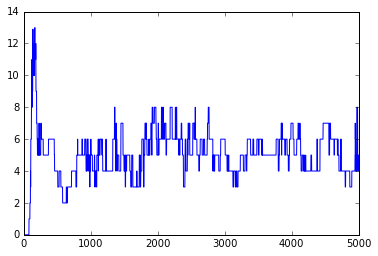

In [20]:
plt.plot(aggreg[:,0], aggreg[:,1])

### Animation

This routine animates the particle position and scalar field data.
Honestly, I still do not completely understand why this works and other things that I tried did not work.  Be careful about returning axis objects with or without a comma.  It seems to cause a problem sometimes one way and sometimes the other (**"return field"** not "return field,"; but **"return dots,"** not "return dots").

In [ ]:
fig   = plt.figure()
ax    = plt.subplot(1,1,1)
field = ax.pcolormesh(Swimmers.xm,Swimmers.ym,scalar_store[1])
field.set_clim(0,0.08)
dots, = ax.plot([], [], 'ro')
fig.colorbar(field)

def initit():
    dots.set_data([], [])
    return field,dots

def animate(k):
    arr = scalar_store[k]
    arr = arr[:-1, :-1]
    field.set_array(arr.ravel())
    plt.title('Frame {0:d}'.format(k))
    dots.set_data(pos_store[k][:,0],pos_store[k][:,1])

    return field,dots
    
anim = matplotlib.animation.FuncAnimation(fig,animate,frames=range(0,len(scalar_store),3),
                                          interval=50,blit=False,repeat=True)

# Uncomment if you want to save it to a file.  Requires mencoder or ffmpeg or some writer utility to generate the file.
anim.save('linAtanDep_lambda_small.mp4', writer='ffmpeg')
#plt.show()

## Extras

In [ ]:
pos_store = list([pos[:,:]])
pos_store = list([np.array(pos)])
scalar_store = list([Swimmers.Meshed()])

#count = 1
for plot in range(0,5):
    for k in range(0,50):
        Swimmers.Update2(Swimmers.scalar,pos,vel)
        pos_store.append(np.array(pos))
        scalar_store.append(Swimmers.Meshed())
        #aggregations = countblob(blobdetect(255*.5, 255, Swimmers.Meshed()),blobdetect2(255*.5, 255, Swimmers.Meshed()),blobdetect3(255*.5, 255, Swimmers.Meshed()))
        #aggreg = np.append(aggreg,[array([count,aggregations])], axis=0)
        #count = count + 1

plt.plot(aggreg[:,0], aggreg[:,1])
plt.xlabel('Time')
plt.ylabel('Aggregations')
plt.title(r'Aggregations for atanDep deposition function')
#plt.savefig('atandep_rep_exp_2')

#plt.show()

In [ ]:
pos_store = list([pos[:,:]])
pos_store = list([np.array(pos)])
scalar_store = list([Swimmers.Meshed()])

#count = 1
for plot in range(0,5):
    for k in range(0,50):
        Swimmers.Update2(Swimmers.scalar,pos,vel)
        pos_store.append(np.array(pos))
        scalar_store.append(Swimmers.Meshed())

In [ ]:
pos_store = list([pos[:,:]])
scalar_store = list([Swimmers.Meshed()])

count = 1
for plot in range(0,5):
    for k in range(0,1000):
        Swimmers.Update2(Swimmers.scalar,pos,vel)
        pos_store.append(np.array(pos))
        scalar_store.append(Swimmers.Meshed())
        aggregations = countblob(blobdetect(255*.54, 255, Swimmers.Meshed()),blobdetect2(255*.54, 255, Swimmers.Meshed()),blobdetect3(255*.54, 255, Swimmers.Meshed()))
        aggreg = np.append(aggreg,[array([count,aggregations])], axis=0)
        count = count + 1

iters = 10
for n in range(1,iters):

    Swimmers = PS.Plankton(atanDep,N = meshsize,depMaxStr=1.0e-4,depVar=4.0e-4,k=0.02,speed=0.05,
                    lambda0=3.0,kappa=6.4e-3,beta=0.25,depTransWidth=1/250,depThreshold=0.08)

    Swimmers.SetBeta(1)
    Swimmers.kappa = 6.4e-3
    Swimmers.lambda0 = 3.0

    Swimmers.SetIC(initial_conditions)

    pos = [array([0.1,0.1])]
    th = rand()*2*pi
    vel = [Swimmers.speed*array([cos(th),sin(th)])]
    for l in range(0,20):
        for k in range(0,20):
            pos = np.append(pos,[array([mod(k*0.05 + 0.01*(rand()-0.5) + 0.05,1),
                                      mod(l*0.05 + 0.01*(rand()-0.5) + 0.05,1)])],axis=0)
            th  = rand()*2*pi
            vel = np.append(vel,[Swimmers.speed*array([cos(th),sin(th)])],axis=0)

    pos_store = list([pos[:,:]])
    scalar_store = list([Swimmers.Meshed()])

    count = 1
    for plot in range(0,5):
        for k in range(0,1000):
            Swimmers.Update2(Swimmers.scalar,pos,vel)
            pos_store.append(np.array(pos))
            scalar_store.append(Swimmers.Meshed())
            aggregations = countblob(blobdetect(255*.54, 255, Swimmers.Meshed()),blobdetect2(255*.54, 255, Swimmers.Meshed()),blobdetect3(255*.54, 255, Swimmers.Meshed()))
            aggreg[count,1] = aggreg[count,1] + aggregations
            count = count + 1
            
plt.plot(aggreg[:,0], aggreg[:,1]/iters)
plt.xlabel('Time')
plt.ylabel('Aggregations')
plt.title(r'Aggregations for atanDep deposition function')
plt.savefig('atandep_rep_exp')

In [ ]:
plt.plot(pos_store[0][:,0],pos_store[0][:,1],'.')

In [ ]:
plt.plot(pos_store[250][:,0],pos_store[250][:,1],'.')

In [ ]:
len(pos_store)